 # preprocessing Microsoft stock prices

In [1]:
import pandas as pd
with open('msft.csv') as f:
    x=pd.read_csv(f)
x

Date       Open       High        Low      Close    Volume  \
0     12/30/2016  62.959999  62.990002  62.029999  62.139999  25465900   
1     12/29/2016  62.860001  63.200001  62.730000  62.900002  10181600   
2     12/28/2016  63.400002  63.400002  62.830002  62.990002  14247400   
3     12/27/2016  63.209999  64.070000  63.209999  63.279999  11583900   
4     12/23/2016  63.450001  63.540001  62.799999  63.240002  12398000   
...          ...        ...        ...        ...        ...       ...   
2513    1/9/2007  30.000000  30.180000  29.730000  29.959999  44636600   
2514    1/8/2007  29.650000  30.100000  29.530001  29.930000  50220200   
2515    1/5/2007  29.629999  29.750000  29.450001  29.639999  44607200   
2516    1/4/2007  29.700001  29.969999  29.440001  29.809999  45774500   
2517    1/3/2007  29.910000  30.250000  29.400000  29.860001  76935100   

      Adj Close  
0     62.139999  
1     62.900002  
2     62.990002  
3     63.279999  
4     63.240002  
...         ...  
2513  23.557044  
2514  23.533456  
2515  23.305433  
2516  23.439102  
2517  23.478417  

[2518 rows x 7 columns]

In [2]:
# reverse the data frame 
new_x = x.iloc[::-1]
new_x

Date       Open       High        Low      Close    Volume  \
2517    1/3/2007  29.910000  30.250000  29.400000  29.860001  76935100   
2516    1/4/2007  29.700001  29.969999  29.440001  29.809999  45774500   
2515    1/5/2007  29.629999  29.750000  29.450001  29.639999  44607200   
2514    1/8/2007  29.650000  30.100000  29.530001  29.930000  50220200   
2513    1/9/2007  30.000000  30.180000  29.730000  29.959999  44636600   
...          ...        ...        ...        ...        ...       ...   
4     12/23/2016  63.450001  63.540001  62.799999  63.240002  12398000   
3     12/27/2016  63.209999  64.070000  63.209999  63.279999  11583900   
2     12/28/2016  63.400002  63.400002  62.830002  62.990002  14247400   
1     12/29/2016  62.860001  63.200001  62.730000  62.900002  10181600   
0     12/30/2016  62.959999  62.990002  62.029999  62.139999  25465900   

      Adj Close  
2517  23.478417  
2516  23.439102  
2515  23.305433  
2514  23.533456  
2513  23.557044  
...         ...  
4     63.240002  
3     63.279999  
2     62.990002  
1     62.900002  
0     62.139999  

[2518 rows x 7 columns]

#  Compute the change in the closing stock price of the stock compared to its previous trading day. Note that the rows in the CSV file have been ordered in such a way that the first row corresponds to the latest closing price (December 30, 2016) and the last row corresponds to the earliest closing price (January 3, 2007). You also need to convert the index of the Series from integers to the date of the stock price.

In [33]:
changeData=[]
for i in range(0,len(new_x)-1):
    changeData.append(new_x.Close[i]-new_x.Close[i+1])

In [34]:
changeData.append(0)
new_x['changeData']=changeData

<ipython-input-34-621df022fa87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_x['changeData']=changeData


In [35]:
new_x

Date       Open       High        Low      Close    Volume  \
2517    1/3/2007  29.910000  30.250000  29.400000  29.860001  76935100   
2516    1/4/2007  29.700001  29.969999  29.440001  29.809999  45774500   
2515    1/5/2007  29.629999  29.750000  29.450001  29.639999  44607200   
2514    1/8/2007  29.650000  30.100000  29.530001  29.930000  50220200   
2513    1/9/2007  30.000000  30.180000  29.730000  29.959999  44636600   
...          ...        ...        ...        ...        ...       ...   
4     12/23/2016  63.450001  63.540001  62.799999  63.240002  12398000   
3     12/27/2016  63.209999  64.070000  63.209999  63.279999  11583900   
2     12/28/2016  63.400002  63.400002  62.830002  62.990002  14247400   
1     12/29/2016  62.860001  63.200001  62.730000  62.900002  10181600   
0     12/30/2016  62.959999  62.990002  62.029999  62.139999  25465900   

      Adj Close  changeData  
2517  23.478417   -0.760003  
2516  23.439102   -0.090000  
2515  23.305433   -0.289997  
2514  23.533456    0.039997  
2513  23.557044   -0.309997  
...         ...         ...  
4     63.240002    0.029999  
3     63.279999    0.290001  
2     62.990002   -0.170000  
1     62.900002   -0.050002  
0     62.139999    0.000000  

[2518 rows x 8 columns]

In [36]:
y=pd.to_datetime(x.Date)
z=x

# . Plot a histogram of the changeData time series (see lecture slides). Does it look morelike a Gaussian distribution (bell-curve)?

Text(0.5, 1.0, 'change data histogram')

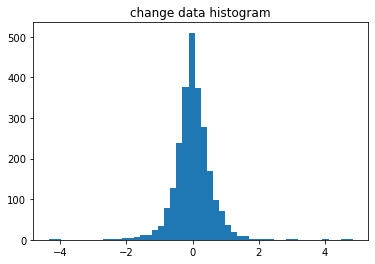

In [37]:
# z['changeData']=pd.Series(changeData)
# %matplotlib inline
# z['changeData'].hist(bin=50)
# z['changeData'].plot(kind="kde",style='k--')
import matplotlib.pyplot as plt
plt.figure()
plt.hist(changeData,bins=50)
plt.title("change data histogram")

 # Suppose we are interested to identify abnormally large increase in the closing price of the stock. Standardize the time series (i.e., compute the Z-score) by subtracting its mean and dividing by its standard deviation. After standardization, select the rows in which the Z scores are above 4 (i.e., the change is more than 4 standard deviations from the mean).

In [38]:
mean = new_x['changeData'].mean()
std = new_x['changeData'].std()

In [39]:
z_scores=[]
dicti={}
for i in range(0,len(changeData)):
    dicti['zscores']=(changeData[i]-mean)/std
    dicti['row']=new_x.loc[i]
    z_scores.append(dicti)
    dicti={}
for i in z_scores:
    if i['zscores']>4:
        print(i['zscores'])

4.228502753202091
4.9517216645694155
5.322149099126087
8.51489776447677
7.968071945591918
4.140307088935128
7.0331809704558905
5.339788584769184


In [40]:
st='Adj Close'
new_df = pd.DataFrame(x.columns)
for i in z_scores:
    if i['zscores']>4:
        print(i['row'].Date,end=' ')
        print(i['row'].Open,end=' ')
        print(i['row'].High,end=' ')
        print(i['row'].Low,end=' ')
        print(i['row'].Close,end=' ')
        print(i['row'].Volume,end=' ')
        print()
    
#         new_df.append(i['row'].values,ignore_index=True)
# new_df

10/21/2016 60.279999 60.450001 59.490002 59.66 80032200 
7/20/2016 56.150002 56.84 55.529999 55.91 89893300 
1/29/2016 54.73 55.09 54.0 55.09 83611700 
10/23/2015 52.299999 54.07 52.25 52.869999 135227100 
4/24/2015 45.66 48.139999 45.650002 47.869999 130933700 
8/23/2013 35.169998 35.200001 34.0 34.75 225493800 
10/13/2008 22.860001 25.5 22.629999 25.5 144935400 
10/26/2007 36.009998 36.029999 34.560001 35.029999 288121200 


# Repeat the previous step, except you should select the rows that have Z-scores below -4.These correspond to the dates in which they is a substantial drop in the price of the stock.

In [41]:
for i in z_scores:
    if i['zscores'] < -4:
        print(i['zscores'])

-7.078407544028606
-4.591240068350707
-7.695786013640186
-7.148963722652467
-4.026772999874207
-4.238450355488596


In [42]:
st='Adj Close'
new_df = pd.DataFrame(x.columns)
for i in z_scores:
    if i['zscores']<-4:
        print(i['row'].Date,end=' ')
        print(i['row'].Open,end=' ')
        print(i['row'].High,end=' ')
        print(i['row'].Low,end=' ')
        print(i['row'].Close,end=' ')
        print(i['row'].Volume,end=' ')
        print()

4/22/2016 51.91 52.43 50.77 51.779999 126834100 
8/21/2015 45.299999 45.48 43.07 43.07 70053100 
1/27/2015 42.950001 43.200001 42.110001 42.66 169164000 
7/19/2013 32.400002 32.669998 31.02 31.4 248428500 
1/22/2009 18.049999 18.18 17.07 17.110001 222436600 
9/29/2008 26.940001 27.66 25.01 25.01 134383100 


# 2. [10 points] For this question, you will apply different discretization methods to the “close”
# column.
# 2.1. Apply equal width discretization to produce 5 bins. Display the first 5 discretized values
# by using the head() function
# 2.2. Apply equal frequency discretization to produce 5 bins. (Note that the quantiles selected
# in the lecture slides will produce only 4 bins. Therefore, you need to choose the appropriate
# quantiles that will produce 5 bins).


In [14]:
bins = pd.cut(x.Close,5)
bins.head()

0    (53.926, 63.62]
1    (53.926, 63.62]
2    (53.926, 63.62]
3    (53.926, 63.62]
4    (53.926, 63.62]
Name: Close, dtype: category
Categories (5, interval[float64]): [(15.102, 24.844] < (24.844, 34.538] < (34.538, 44.232] < (44.232, 53.926] < (53.926, 63.62]]

In [15]:
bins = pd.qcut(x.Close,[0,0.2,0.4,0.6,0.8,1])
bins.head()

0    (44.4, 63.62]
1    (44.4, 63.62]
2    (44.4, 63.62]
3    (44.4, 63.62]
4    (44.4, 63.62]
Name: Close, dtype: category
Categories (5, interval[float64]): [(15.149000000000001, 25.89] < (25.89, 28.678] < (28.678, 31.854] < (31.854, 44.4] < (44.4, 63.62]]

# [20 points] Implement entropy-based discretization (supervised discretization) and apply it on diabetes.csv. Come up with 
# threshold to stop splitting the data. Note that you need to perform the discretization separately for each feature (attribute)

In [3]:
from scipy.stats import entropy as en
import numpy as np
import pandas as pd
diabetes = pd.read_csv('diabetes.csv')
[]'preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'
diabetes.columns

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [125]:
#unique classes in the dataset
e=np.unique(diabetes['class'])
e

array(['tested_negative', 'tested_positive'], dtype=object)

In [126]:
#the number of unique class
n = diabetes.nunique()['class']
n

2

In [127]:
preg=en(diabetes.preg)
plas=en(diabetes.plas)
pres=en(diabetes.pres)
skin=en(diabetes.skin)
insu=en(diabetes.insu)
mass=en(diabetes.mass)
pedi=en(diabetes.pedi)
age=en(diabetes.age)
age

6.586286033051188

In [129]:


import pandas as pd
preg = pd.Series(diabetes.preg)
plas = pd.Series(diabetes.plas)
pres = pd.Series(diabetes.pres)
skin = pd.Series(diabetes.skin)
insu = pd.Series(diabetes.insu)
mass = pd.Series(diabetes.mass)
pedi = pd.Series(diabetes.pedi)
age = pd.Series(diabetes.age)

preg = np.array(preg)
plas = np.array(plas)
pres = np.array(pres)
skin = np.array(skin)
insu = np.array(insu)
mass = np.array(mass)
pedi = np.array(pedi)
age = np.array(age)

data_preg = np.unique(preg,return_counts=True)
data_plas = np.unique(plas,return_counts=True)
data_pres = np.unique(pres,return_counts=True)
data_skin = np.unique(skin,return_counts=True)
data_insu = np.unique(insu,return_counts=True)
data_mass = np.unique(mass,return_counts=True)
data_pedi = np.unique(pedi,return_counts=True)
data_age = np.unique(age,return_counts=True)

en_preg = en(data_preg)
en_plas = en(data_plas)
en_pres = en(data_pres)
en_skin = en(data_skin)
en_insu = en(data_insu)
en_mass = en(data_mass)
en_pedi = en(data_pedi)
en_age = en(data_age)

In [131]:
en_plas

array([0.        , 0.10656596, 0.08831978, 0.14804225, 0.08256494,
       0.08151041, 0.07851576, 0.0766488 , 0.17504099, 0.20821546,
       0.07237779, 0.16626787, 0.202273  , 0.12045603, 0.11924693,
       0.11806416, 0.19490869, 0.15693611, 0.25303698, 0.2509548 ,
       0.15268873, 0.24690236, 0.33888561, 0.26910675, 0.14740374,
       0.26504609, 0.30893097, 0.23556959, 0.34423222, 0.30253782,
       0.30047131, 0.25363895, 0.25184249, 0.36766228, 0.27118937,
       0.29059017, 0.13370814, 0.41668078, 0.41446756, 0.2831877 ,
       0.35283153, 0.27964077, 0.21168754, 0.34686955, 0.36023052,
       0.30992587, 0.34112514, 0.32326328, 0.20356091, 0.3506765 ,
       0.33378402, 0.17541333, 0.29788597, 0.27876937, 0.21838083,
       0.29303653, 0.19373848, 0.2898995 , 0.28835872, 0.19031927,
       0.30150064, 0.24891028, 0.28237284, 0.32666084, 0.24493003,
       0.16114321, 0.27665579, 0.32044881, 0.20172655, 0.15752225,
       0.15664484, 0.15577815, 0.17692035, 0.13046478, 0.21455

# 4. [15 points] Compute both for covariance and correlation matrices for Microsoft stock and diabetes
# datasets. Based on these matrices, what are the best features (for each dataset) according to the
# variance? Also, select a subset of features (for each dataset).


In [106]:
cov_matrix=x.cov()
cov_matrix

Open          High           Low         Close  \
Open       1.110131e+02  1.115250e+02  1.104883e+02  1.110599e+02   
High       1.115250e+02  1.121317e+02  1.110308e+02  1.116676e+02   
Low        1.104883e+02  1.110308e+02  1.100627e+02  1.106339e+02   
Close      1.110599e+02  1.116676e+02  1.106339e+02  1.112978e+02   
Volume    -1.393116e+08 -1.377848e+08 -1.418799e+08 -1.404495e+08   
Adj Close  1.226826e+02  1.233442e+02  1.222048e+02  1.229355e+02   

                 Volume     Adj Close  
Open      -1.393116e+08  1.226826e+02  
High      -1.377848e+08  1.233442e+02  
Low       -1.418799e+08  1.222048e+02  
Close     -1.404495e+08  1.229355e+02  
Volume     8.458491e+14 -1.609058e+08  
Adj Close -1.609058e+08  1.371603e+02

In [116]:
max(cov_matrix)

'Volume'

In [107]:
corr_matrix=x.corr()
corr_matrix

Open      High       Low     Close    Volume  Adj Close
Open       1.000000  0.999588  0.999560  0.999141 -0.454625   0.994218
High       0.999588  1.000000  0.999445  0.999585 -0.447394   0.994581
Low        0.999560  0.999445  1.000000  0.999597 -0.465002   0.994612
Close      0.999141  0.999585  0.999597  1.000000 -0.457752   0.994992
Volume    -0.454625 -0.447394 -0.465002 -0.457752  1.000000  -0.472401
Adj Close  0.994218  0.994581  0.994612  0.994992 -0.472401   1.000000

In [114]:
max(corr_matrix)

'Volume'

In [119]:
cov_mat=diabetes.cov()
cov_mat

preg         plas        pres        skin          insu  \
preg  11.354056    13.947131    9.214538   -4.390041    -28.555231   
plas  13.947131  1022.248314   94.430956   29.239183   1220.935799   
pres   9.214538    94.430956  374.647271   64.029396    198.378412   
skin  -4.390041    29.239183   64.029396  254.473245    802.979941   
insu -28.555231  1220.935799  198.378412  802.979941  13281.180078   
mass   0.469774    55.726987   43.004695   49.373869    179.775172   
pedi  -0.037426     1.454875    0.264638    0.972136      7.066681   
age   21.570620    99.082805   54.523453  -21.381023    -57.143290   

            mass      pedi         age  
preg    0.469774 -0.037426   21.570620  
plas   55.726987  1.454875   99.082805  
pres   43.004695  0.264638   54.523453  
skin   49.373869  0.972136  -21.381023  
insu  179.775172  7.066681  -57.143290  
mass   62.159984  0.367405    3.360330  
pedi    0.367405  0.109779    0.130772  
age     3.360330  0.130772  138.303046

In [128]:
max(cov_mat)

'skin'

In [123]:
cor_mat=diabetes.corr()
cor_mat

preg      plas      pres      skin      insu      mass      pedi  \
preg  1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683 -0.033523   
plas  0.129459  1.000000  0.152590  0.057328  0.331357  0.221071  0.137337   
pres  0.141282  0.152590  1.000000  0.207371  0.088933  0.281805  0.041265   
skin -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573  0.183928   
insu -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859  0.185071   
mass  0.017683  0.221071  0.281805  0.392573  0.197859  1.000000  0.140647   
pedi -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647  1.000000   
age   0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242  0.033561   

           age  
preg  0.544341  
plas  0.263514  
pres  0.239528  
skin -0.113970  
insu -0.042163  
mass  0.036242  
pedi  0.033561  
age   1.000000

In [126]:
max(cor_mat)

'skin'

# [25 points] Principal component analysis
# 5.1. Compute PCA for Microsoft stock and diabetes datasets as described in the lecture.
# 5.2. How many PCs are needed to capture 90% of variance for each dataset? What about
# 99%?
# 5.3. Use two PCs and visualize the samples. For diabetes dataset, apply different colors for
# positive and negative classes. Do you see any pattern?
# 5.4. Get feature importance using PCs similar to what presented in the lecture. Explain your
# findings.


In [20]:
#pca microsoft
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import PCA
# scaler = MinMaxScaler()
# data_rescaled = scaler.fit_transform(x.to_numpy())
# data_rescaled.shape
new_x = x
del new_x['Date']
new_x


Open       High        Low      Close    Volume  Adj Close
0     62.959999  62.990002  62.029999  62.139999  25465900  62.139999
1     62.860001  63.200001  62.730000  62.900002  10181600  62.900002
2     63.400002  63.400002  62.830002  62.990002  14247400  62.990002
3     63.209999  64.070000  63.209999  63.279999  11583900  63.279999
4     63.450001  63.540001  62.799999  63.240002  12398000  63.240002
...         ...        ...        ...        ...       ...        ...
2513  30.000000  30.180000  29.730000  29.959999  44636600  23.557044
2514  29.650000  30.100000  29.530001  29.930000  50220200  23.533456
2515  29.629999  29.750000  29.450001  29.639999  44607200  23.305433
2516  29.700001  29.969999  29.440001  29.809999  45774500  23.439102
2517  29.910000  30.250000  29.400000  29.860001  76935100  23.478417

[2518 rows x 6 columns]

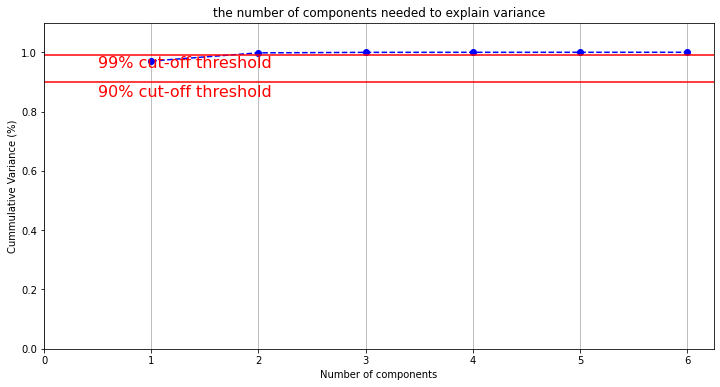

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(new_x.to_numpy())
data_rescaled.shape

pca = PCA().fit(data_rescaled)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(12,6)
fig,ax = plt.subplots()
xi = np.arange(1,7,step=1)
y= np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi,y,marker='o',linestyle='--',color='b')
plt.xlabel('Number of components')
plt.xticks(np.arange(0,7,step=1))
plt.ylabel('Cummulative Variance (%)')
plt.title('the number of components needed to explain variance')
plt.axhline(y=0.90,color='r',linestyle='-')
plt.text(0.5,0.85,'90% cut-off threshold',color='red',fontsize=16)
plt.axhline(y=0.99,color='r',linestyle='-')
plt.text(0.5,0.95,'99% cut-off threshold',color='red',fontsize=16)
ax.grid(axis='x')
plt.show()



In [291]:
import pandas as pd
diabetes = pd.read_csv('diabetes.csv')
mask1= diabetes['class']=='tested_positive'
mask2= diabetes['class']=='tested_negative'
positive_diabetes=diabetes[mask1]
negative_diabetes=diabetes[mask2]
p_diabetes = positive_diabetes
n_diabetes = negative_diabetes

# for test_positive dataset

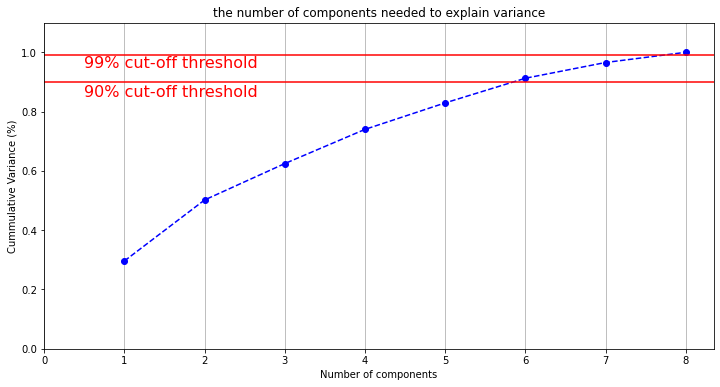

In [292]:
del p_diabetes['class']
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(p_diabetes.to_numpy())
data_rescaled.shape

pca = PCA().fit(data_rescaled)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(12,6)
fig,ax = plt.subplots()
xi = np.arange(1,9,step=1)
y= np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi,y,marker='o',linestyle='--',color='b')
plt.xlabel('Number of components')
plt.xticks(np.arange(0,9,step=1))
plt.ylabel('Cummulative Variance (%)')
plt.title('the number of components needed to explain variance')
plt.axhline(y=0.90,color='r',linestyle='-')
plt.text(0.5,0.85,'90% cut-off threshold',color='red',fontsize=16)
plt.axhline(y=0.99,color='r',linestyle='-')
plt.text(0.5,0.95,'99% cut-off threshold',color='red',fontsize=16)
ax.grid(axis='x')
plt.show()

# for negative test data set

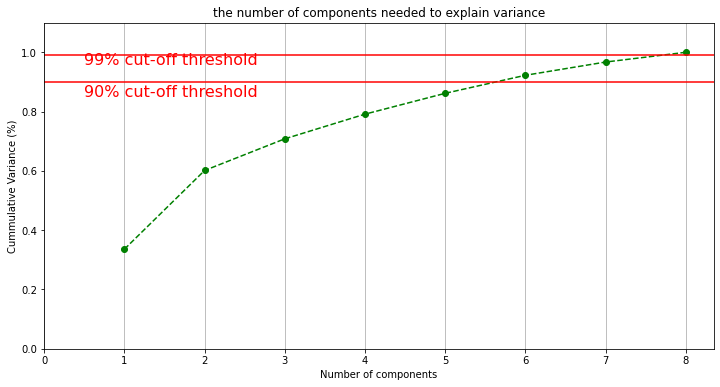

In [293]:
del n_diabetes['class']
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(n_diabetes.to_numpy())
data_rescaled.shape

pca = PCA().fit(data_rescaled)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(12,6)
fig,ax = plt.subplots()
xi = np.arange(1,9,step=1)
y= np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi,y,marker='o',linestyle='--',color='g')
plt.xlabel('Number of components')
plt.xticks(np.arange(0,9,step=1))
plt.ylabel('Cummulative Variance (%)')
plt.title('the number of components needed to explain variance')
plt.axhline(y=0.90,color='r',linestyle='-')
plt.text(0.5,0.85,'90% cut-off threshold',color='red',fontsize=16)
plt.axhline(y=0.99,color='r',linestyle='-')
plt.text(0.5,0.96,'99% cut-off threshold',color='red',fontsize=16)
ax.grid(axis='x')
plt.show()

In [66]:
data = pd.read_csv('diabetes.csv', header='infer')
numComponents = 2
cov = data.cov().to_numpy()
da = data.to_numpy()
da = da[:,:3]
[eigvalues, p] = linalg.eig(cov)
print(eigvalues)
M = (da-mean(da.T,axis=1)).T
pj = dot(p.T,M)
pj = DataFrame(projected[:,:numComponents],columns=['p1','p2'])
pj

[1.34565730e+04 9.32760132e+02 3.90577831e+02 1.98182691e+02
 1.12689115e+02 4.58294431e+01 7.76070899e+00 1.02871018e-01]


TypeError: 'float' object is not callable

In [67]:
pj.plot(kind='scatter')

NameError: name 'pj' is not defined

# [15 point] Apply appropriate text prepocessing operations on BuzzFeed tweets. You can utilizetweet preprocessor for further preprocessing e.g., removing emojis.

In [ ]:
with open('BuzzFeed-tweets-text.txt',encoding='utf8') as f:
    bf=f.readlines()

In [72]:
text=bf

In [74]:
import string
import re
string.punctuationfree="".join([i for i in text if i not in string.punctuation])
string.punctuationfree

'I didn\'t hate all these, but...did they need to happen? https://t.co/kqGYno5HHY\nDouble Luge Is The Weirdest But Best Olympic Sport https://t.co/QyrV8o22Xk\nYou can read the full article and find the rest of Zoë\'s interview here ✨➡️ https://t.co/ar741AhP1A\nThe show meant a lot to people, but now that Zoë\'s conversations about High Fidelity\'s cancellation have made their… https://t.co/dI62b2LWYt\nDa\'Vine had high hopes for Season 2, telling BuzzFeed, "I wanted to show that she\'s not a stereotype and show her w… https://t.co/mGza4g5paD\nThe decision to end High Fidelity came as a surprise to both the fans and the cast, because not only did the series… https://t.co/c489j9R70D\nBut this wasn\'t the first time she called out Hulu for their decision. After sharing a sweet farewell message to th… https://t.co/QalOMyFUmw\n"The amount of letters, DMs, people on the street, and women that look like us — like, that love for the show, it m… https://t.co/ERkGbz4aQR\n"They didn’t realize wha

In [77]:
for i in text:
    print(i.lower())


i didn't hate all these, but...did they need to happen? https://t.co/kqgyno5hhy

double luge is the weirdest but best olympic sport https://t.co/qyrv8o22xk

you can read the full article and find the rest of zoë's interview here ✨➡️ https://t.co/ar741ahp1a

the show meant a lot to people, but now that zoë's conversations about high fidelity's cancellation have made their… https://t.co/di62b2lwyt

da'vine had high hopes for season 2, telling buzzfeed, "i wanted to show that she's not a stereotype and show her w… https://t.co/mgza4g5pad

the decision to end high fidelity came as a surprise to both the fans and the cast, because not only did the series… https://t.co/c489j9r70d

but this wasn't the first time she called out hulu for their decision. after sharing a sweet farewell message to th… https://t.co/qalomyfumw

"the amount of letters, dms, people on the street, and women that look like us — like, that love for the show, it m… https://t.co/erkgbz4aqr

"they didn’t realize what that s

In [81]:
tokens=[]
for i in text:
    tokens.append(i.split(' '))
tokens

[['I',
  "didn't",
  'hate',
  'all',
  'these,',
  'but...did',
  'they',
  'need',
  'to',
  'happen?',
  'https://t.co/kqGYno5HHY\n'],
 ['Double',
  'Luge',
  'Is',
  'The',
  'Weirdest',
  'But',
  'Best',
  'Olympic',
  'Sport',
  'https://t.co/QyrV8o22Xk\n'],
 ['You',
  'can',
  'read',
  'the',
  'full',
  'article',
  'and',
  'find',
  'the',
  'rest',
  'of',
  "Zoë's",
  'interview',
  'here',
  '✨➡️',
  'https://t.co/ar741AhP1A\n'],
 ['The',
  'show',
  'meant',
  'a',
  'lot',
  'to',
  'people,',
  'but',
  'now',
  'that',
  "Zoë's",
  'conversations',
  'about',
  'High',
  "Fidelity's",
  'cancellation',
  'have',
  'made',
  'their…',
  'https://t.co/dI62b2LWYt\n'],
 ["Da'Vine",
  'had',
  'high',
  'hopes',
  'for',
  'Season',
  '2,',
  'telling',
  'BuzzFeed,',
  '"I',
  'wanted',
  'to',
  'show',
  'that',
  "she's",
  'not',
  'a',
  'stereotype',
  'and',
  'show',
  'her',
  'w…',
  'https://t.co/mGza4g5paD\n'],
 ['The',
  'decision',
  'to',
  'end',
  'High'

In [85]:
for i in text:
    print(re.split(' ',i))

['I', "didn't", 'hate', 'all', 'these,', 'but...did', 'they', 'need', 'to', 'happen?', 'https://t.co/kqGYno5HHY\n']
['Double', 'Luge', 'Is', 'The', 'Weirdest', 'But', 'Best', 'Olympic', 'Sport', 'https://t.co/QyrV8o22Xk\n']
['You', 'can', 'read', 'the', 'full', 'article', 'and', 'find', 'the', 'rest', 'of', "Zoë's", 'interview', 'here', '✨➡️', 'https://t.co/ar741AhP1A\n']
['The', 'show', 'meant', 'a', 'lot', 'to', 'people,', 'but', 'now', 'that', "Zoë's", 'conversations', 'about', 'High', "Fidelity's", 'cancellation', 'have', 'made', 'their…', 'https://t.co/dI62b2LWYt\n']
["Da'Vine", 'had', 'high', 'hopes', 'for', 'Season', '2,', 'telling', 'BuzzFeed,', '"I', 'wanted', 'to', 'show', 'that', "she's", 'not', 'a', 'stereotype', 'and', 'show', 'her', 'w…', 'https://t.co/mGza4g5paD\n']
['The', 'decision', 'to', 'end', 'High', 'Fidelity', 'came', 'as', 'a', 'surprise', 'to', 'both', 'the', 'fans', 'and', 'the', 'cast,', 'because', 'not', 'only', 'did', 'the', 'series…', 'https://t.co/c489j9R

In [86]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [92]:
for t in text:
    print([i  for i in t.lower().split(' ') if i not in stopwords])

['hate', 'these,', 'but...did', 'need', 'happen?', 'https://t.co/kqgyno5hhy\n']
['double', 'luge', 'weirdest', 'best', 'olympic', 'sport', 'https://t.co/qyrv8o22xk\n']
['read', 'full', 'article', 'find', 'rest', "zoë's", 'interview', '✨➡️', 'https://t.co/ar741ahp1a\n']
['show', 'meant', 'lot', 'people,', "zoë's", 'conversations', 'high', "fidelity's", 'cancellation', 'made', 'their…', 'https://t.co/di62b2lwyt\n']
["da'vine", 'high', 'hopes', 'season', '2,', 'telling', 'buzzfeed,', '"i', 'wanted', 'show', 'stereotype', 'show', 'w…', 'https://t.co/mgza4g5pad\n']
['decision', 'end', 'high', 'fidelity', 'came', 'surprise', 'fans', 'cast,', 'series…', 'https://t.co/c489j9r70d\n']
['first', 'time', 'called', 'hulu', 'decision.', 'sharing', 'sweet', 'farewell', 'message', 'th…', 'https://t.co/qalomyfumw\n']
['"the', 'amount', 'letters,', 'dms,', 'people', 'street,', 'women', 'look', 'like', 'us', '—', 'like,', 'love', 'show,', 'm…', 'https://t.co/erkgbz4aqr\n']
['"they', 'didn’t', 'realize', 

In [99]:
for i in tokens:
    print([porter_stemmer.stem(word) for word in i])

['i', "didn't", 'hate', 'all', 'these,', 'but...did', 'they', 'need', 'to', 'happen?', 'https://t.co/kqgyno5hhy\n']
['doubl', 'luge', 'is', 'the', 'weirdest', 'but', 'best', 'olymp', 'sport', 'https://t.co/qyrv8o22xk\n']
['you', 'can', 'read', 'the', 'full', 'articl', 'and', 'find', 'the', 'rest', 'of', "zoë'", 'interview', 'here', '✨➡️', 'https://t.co/ar741ahp1a\n']
['the', 'show', 'meant', 'a', 'lot', 'to', 'people,', 'but', 'now', 'that', "zoë'", 'convers', 'about', 'high', "fidelity'", 'cancel', 'have', 'made', 'their…', 'https://t.co/di62b2lwyt\n']
["da'vin", 'had', 'high', 'hope', 'for', 'season', '2,', 'tell', 'buzzfeed,', '"i', 'want', 'to', 'show', 'that', "she'", 'not', 'a', 'stereotyp', 'and', 'show', 'her', 'w…', 'https://t.co/mgza4g5pad\n']
['the', 'decis', 'to', 'end', 'high', 'fidel', 'came', 'as', 'a', 'surpris', 'to', 'both', 'the', 'fan', 'and', 'the', 'cast,', 'becaus', 'not', 'onli', 'did', 'the', 'series…', 'https://t.co/c489j9r70d\n']
['but', 'thi', "wasn't", 'the

['liter', 'the', 'opposit', 'of', 'to', 'forgiv', 'and', 'forget.', 'https://t.co/hxdpp1hyok\n']
['✍️✍️✍️', 'https://t.co/jtfmtahszt\n']
['“i', 'don’t', 'want', 'those', 'dolls,', 'mom.', 'they’r', 'cultur', 'inappropriate.”', '—lili', 'to', 'charlotte.', '😳', 'https://t.co/o3llycyyg8\n']
['https://t.co/2vemwdfuzl\n']
['if', 'you', 'grew', 'up/liv', 'in', 'the', 'country,', 'what’', 'someth', 'everi', 'citi', 'kid', 'should', 'know?', 'https://t.co/nn5nndtd7f\n']
['today', 'i', 'learn', 'that', 'back', 'flip', 'on', 'ice', 'are', 'illegal.', 'https://t.co/xulbslncxp\n']
['turn', 'out', 'not', 'all', 'celeb', 'drop', 'out', 'of', 'colleg', 'to', 'becom', 'famous!!', 'https://t.co/4vxijvkbte\n']
['the', 'creator', 'of', 'the', 'nft', 'say', 'it’', 'a', '“uniqu', 'and', 'progress', 'way', 'to', 'celebr', 'the', 'monument', 'life', 'of', 'georg', 'floyd”', 'a…', 'https://t.co/kaatsg1c0l\n']
['they', 'had', 'it', 'comin’...', 'https://t.co/ccmt8ozonv\n']
['wear', 'it', 'like', 'a', 'badg', 

['"all', 'of', 'these', 'young', 'girl', 'who', 'are', 'just', 'look', 'at', 'these', 'magazines...their', 'percept', 'is', 'that', 'thi', 'is', 'realiti', 'and', 'it…', 'https://t.co/8zjivs1y7a\n']
['paper', 'snowflak', 'are', 'too', 'easi', 'compar', 'to', 'thi', '✂️', 'https://t.co/6i6gmvocyp\n']
['i', 'will', 'never', 'get', 'over', 'calli', 'and', 'brandon', 'from', 'the', 'foster', 'sleep', 'togeth', 'even', 'though', 'they', 'were', 'foster', 'siblings.', 'https://t.co/edeivbcbag\n']
['for', 'everyon', 'who', 'didn’t', 'know', 'there', 'wa', 'a', 'winter', 'olymp', 'happen', 'until', 'a', 'few', 'day', 'ago...', 'https://t.co/ulwsywby9q\n']
['but', 'now', 'the', 'song', 'is', 'final', 'almost', 'here!', '"the', 'joker', 'and', 'the', 'queen"', 'come', 'out', 'friday,', 'so', 'get', 'your', 'ear', 'ready,', 'people…', 'https://t.co/a2lovms7wt\n']
['and', 'then', 'taylor', 'wa', 'appar', 'go', 'around', 'sell', 'pack', 'of', 'play', 'card', 'on', 'her', 'promo', 'tour', 'for', 're

['"it\'', 'go', 'back', 'in', 'time', 'and', 'saying,', "'what", 'were', 'their', 'want', 'and', 'desires?\'"', 'she', 'said.', '"they', "weren't", 'these', 'one-dimens…', 'https://t.co/qekbzjkdpm\n']
['read', 'more', 'about', 'it', 'here', '⬇️', 'https://t.co/pxuknsncv0\n']
['"there\'', 'alway', 'been', 'a', 'familiar', 'deep', 'down', 'with', 'what', 'kate', 'wants,"', 'she', 'said.', '"that\'', 'what', 'i', 'love', 'about', 'show', 'like…', 'https://t.co/rbbb0k4njd\n']
['and', 'although', 'fan-favorit', 'regé-jean', 'page', 'will', 'not', 'appear', 'in', 'season', '2', 'to', 'deliv', 'anoth', 'staircas', 'sex', 'scene,', 'newcom…', 'https://t.co/82zddhny2o\n']
['nicola', 'coughlan', '(penelop', 'featherington)', 'said', 'that', 'the', 'focu', 'on', "women'", 'pleasur', 'in', 'the', 'seri', 'is', 'to', 'show', 'that', '19th…', 'https://t.co/kwq1aj7fop\n']
['"but', 'the', 'femal', 'gaze', 'is', 'so', 'import', 'becaus', 'there', 'are', 'mani', 'way', 'peopl', 'commun', 'by', 'sex,', '

In [121]:
res=[]
import preprocessor as p
for i in bf:
    res.append(p.clean(i))
res

["I didn't hate all these, but...did they need to happen?",
 'Double Luge Is The Weirdest But Best Olympic Sport',
 "You can read the full article and find the rest of Zo's interview here",
 "The show meant a lot to people, but now that Zo's conversations about High Fidelity's cancellation have made their",
 'Da\'Vine had high hopes for Season , telling BuzzFeed, "I wanted to show that she\'s not a stereotype and show her w',
 'The decision to end High Fidelity came as a surprise to both the fans and the cast, because not only did the series',
 "But this wasn't the first time she called out Hulu for their decision. After sharing a sweet farewell message to th",
 '"The amount of letters, DMs, people on the street, and women that look like us like, that love for the show, it m',
 '"They didnt realize what that show was and what it could do," said Zo who was not only the series lead, but als',
 'And now, after the two-year anniversary of the series debut, Zo is speaking out about the impa

In [119]:
def remove_URL(text):
    return re.sub(r"http\S+", "", text)
for j in text:
    print(remove_URL(j))


I didn't hate all these, but...did they need to happen? 

Double Luge Is The Weirdest But Best Olympic Sport 

You can read the full article and find the rest of Zoë's interview here ✨➡️ 

The show meant a lot to people, but now that Zoë's conversations about High Fidelity's cancellation have made their… 

Da'Vine had high hopes for Season 2, telling BuzzFeed, "I wanted to show that she's not a stereotype and show her w… 

The decision to end High Fidelity came as a surprise to both the fans and the cast, because not only did the series… 

But this wasn't the first time she called out Hulu for their decision. After sharing a sweet farewell message to th… 

"The amount of letters, DMs, people on the street, and women that look like us — like, that love for the show, it m… 

"They didn’t realize what that show was and what it could do," said Zoë — who was not only the series lead, but als… 

And now, after the two-year anniversary of the series debut, Zoë is speaking out about the impact

In [116]:
res

["I didn't hate all these, but...did they need to happen?",
 'Double Luge Is The Weirdest But Best Olympic Sport',
 "You can read the full article and find the rest of Zo's interview here",
 "The show meant a lot to people, but now that Zo's conversations about High Fidelity's cancellation have made their",
 'Da\'Vine had high hopes for Season , telling BuzzFeed, "I wanted to show that she\'s not a stereotype and show her w',
 'The decision to end High Fidelity came as a surprise to both the fans and the cast, because not only did the series',
 "But this wasn't the first time she called out Hulu for their decision. After sharing a sweet farewell message to th",
 '"The amount of letters, DMs, people on the street, and women that look like us like, that love for the show, it m',
 '"They didnt realize what that show was and what it could do," said Zo who was not only the series lead, but als',
 'And now, after the two-year anniversary of the series debut, Zo is speaking out about the impa

Bonus [20 points] Compare both the dimension and top (e.g., 200) BoW and bi-grams before and
after text prepossessing of BuzzFeed. What are your observations? How do you think prepossessing
help data analysis?

In [43]:
with open('BuzzFeed-tweets-text.txt',encoding='utf8') as f:
    bf=f.readlines()

Before text  Processing

In [44]:
#BoW
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words = None)
vectorizer.fit(bf)
print(vectorizer.vocabulary_)

{'didn': 1070, 'hate': 1660, 'all': 293, 'these': 3526, 'but': 647, 'did': 1069, 'they': 3527, 'need': 2406, 'to': 3576, 'happen': 1648, 'https': 1770, 'co': 829, 'kqgyno5hhy': 2037, 'double': 1119, 'luge': 2177, 'is': 1879, 'the': 3515, 'weirdest': 3871, 'best': 516, 'olympic': 2526, 'sport': 3322, 'qyrv8o22xk': 2858, 'you': 4035, 'can': 683, 'read': 2899, 'full': 1485, 'article': 387, 'and': 325, 'find': 1399, 'rest': 2977, 'of': 2505, 'zoë': 4078, 'interview': 1865, 'here': 1694, 'ar741ahp1a': 376, 'show': 3196, 'meant': 2259, 'lot': 2158, 'people': 2637, 'now': 2473, 'that': 3514, 'conversations': 895, 'about': 212, 'high': 1706, 'fidelity': 1383, 'cancellation': 687, 'have': 1664, 'made': 2199, 'their': 3517, 'di62b2lwyt': 1062, 'da': 978, 'vine': 3775, 'had': 1626, 'hopes': 1749, 'for': 1442, 'season': 3118, 'telling': 3494, 'buzzfeed': 652, 'wanted': 3830, 'she': 3174, 'not': 2465, 'stereotype': 3362, 'her': 1692, 'mgza4g5pad': 2283, 'decision': 1016, 'end': 1234, 'came': 679, '

In [45]:
#Bi-Grams
import nltk
nltk.download('punkt')
stop = True
n_gram=2
text=[]
for t in bf:
        text.append(t)
tokens=[]
for i in text:
    token = nltk.word_tokenize(i)
    tokens.append(token)
    token=''
bigrms=[]
for j in tokens:
    bigrms.append(nltk.bigrams(j))
for k in bigrms:
    print(*map(' '.join, k), sep=', ')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vemir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


I did, did n't, n't hate, hate all, all these, these ,, , but, but ..., ... did, did they, they need, need to, to happen, happen ?, ? https, https :, : //t.co/kqGYno5HHY
Double Luge, Luge Is, Is The, The Weirdest, Weirdest But, But Best, Best Olympic, Olympic Sport, Sport https, https :, : //t.co/QyrV8o22Xk
You can, can read, read the, the full, full article, article and, and find, find the, the rest, rest of, of Zoë, Zoë 's, 's interview, interview here, here ✨➡️, ✨➡️ https, https :, : //t.co/ar741AhP1A
The show, show meant, meant a, a lot, lot to, to people, people ,, , but, but now, now that, that Zoë, Zoë 's, 's conversations, conversations about, about High, High Fidelity, Fidelity 's, 's cancellation, cancellation have, have made, made their…, their… https, https :, : //t.co/dI62b2LWYt
Da'Vine had, had high, high hopes, hopes for, for Season, Season 2, 2 ,, , telling, telling BuzzFeed, BuzzFeed ,, , ``, `` I, I wanted, wanted to, to show, show that, that she, she 's, 's not, not 

7 ., . Two, Two deaf, deaf rappers, rappers ,, , Sean, Sean Forbes, Forbes and, and Warren, Warren “, “ WaWa, WaWa ”, ” Snipe, Snipe ,, , reportedly, reportedly performed, performed alongside, alongside the, the headliners, headliners —, — making, making it…, it… https, https :, : //t.co/Pv0rxpuuys
6 ., . This, This year, year ’, ’ s, s halftime, halftime show, show was, was the, the first, first time, time since, since 2012, 2012 that, that five, five musical, musical artists, artists performed, performed —, — the, the last, last time, time bein…, bein… https, https :, : //t.co/gNteNg4Mq2
4 ., . Dr., Dr. Dre, Dre and, and Kendrick, Kendrick Lamar, Lamar are, are both, both from, from Compton, Compton ,, , and, and Snoop, Snoop Dogg, Dogg is, is from, from Long, Long Beach, Beach —, — meaning, meaning that, that most, most of, of this…, this… https, https :, : //t.co/g2WYZNxa4P
2 ., . Halftime, Halftime artists, artists do, do n't, n't actually, actually get, get paid, paid to, to perf

Just a, a day, day earlier, earlier ,, , rapper, rapper Eve, Eve and, and her, her husband, husband ,, , Maximillion, Maximillion Cooper, Cooper ,, , welcomed, welcomed their, their first, first child, child ,, , named, named Wilde, Wilde Wolf, Wolf Fi…, Fi… https, https :, : //t.co/KWNzpLo3Gr
Kylie Jenner, Jenner and, and Travis, Travis Scott, Scott welcomed, welcomed their, their second, second child, child ,, , named, named Wolf, Wolf ,, , on, on ``, `` 2/2/22, 2/2/22 '', '' —, — obviously, obviously because, because it, it is, is more, more a…, a… https, https :, : //t.co/sAbFgJ8X5w
Oscars discourse, discourse has, has officially, officially begun, begun as, as nominations, nominations were, were announced, announced early, early this, this week, week ., . Some, Some highlights, highlights include, include :, : a, a snu…, snu… https, https :, : //t.co/kkJ77plSi1
It was, was the, the Euphoria, Euphoria of, of Sundays, Sundays and, and the, the Super, Super Bowl, Bowl of, of Sundays,

Suddenly every, every drink, drink I, I previously, previously ordered, ordered at, at Starbucks, Starbucks tasted, tasted like, like North, North Texas, Texas tap, tap water, water in, in comparison, comparison to, to what, what I, I wa…, wa… https, https :, : //t.co/MMuRWdtWXI
So ,, , I, I stepped, stepped outside, outside and, and took, took my, my first, first sip, sip ., . My, My eyes, eyes widened, widened ., . The, The dusty, dusty matcha, matcha and, and coconut, coconut milk, milk danced, danced on, on my, my tongue…, tongue… https, https :, : //t.co/qFFVx564lk
So I, I headed, headed to, to my, my local, local Starbucks, Starbucks so, so I, I could, could feel, feel like, like I, I was, was Emmy, Emmy Award-winning, Award-winning actor, actor Zendaya, Zendaya ., . I, I placed, placed my, my order, order —…, —… https, https :, : //t.co/jgqUg6TKQ1
Now ,, , while, while I, I ca, ca n't, n't 100, 100 %, % verify, verify the, the visit, visit or, or the, the order, order ,, , I, I 

I think, think Pretty, Pretty Little, Little Liars, Liars wins, wins for, for most, most shocking, shocking moments, moments ,, , but, but One, One Tree, Tree Hill, Hill 's, 's a, a close, close second, second ., . https, https :, : //t.co/EXzSbCujOn
RT @, @ tasty, tasty :, : Have, Have you, you tried, tried Steamed, Steamed Bread, Bread and, and Pandan, Pandan Coconut, Coconut Custards, Custards ?, ? ?, ? Watch, Watch Inga, Inga walk, walk you, you through, through it, it !, ! 🤗, 🤗 https, https :, : //t.co/pfOvCmS6jB
Hanging out, out with, with zombies, zombies is, is real, real fun, fun ., . https, https :, : //t.co/JRy1UcoqMB
The millennial, millennial urge, urge to, to think, think BuzzFeed, BuzzFeed quizzes, quizzes will, will fix, fix my, my anxiety, anxiety https, https :, : //t.co/JwTvYT5KVb
They were, were not, not expecting, expecting this, this kind, kind of, of genius, genius ., . https, https :, : //t.co/MzIEHKZLvu
RT @, @ cocoabutterbf, cocoabutterbf :, : Take, Take Notes

Keep your, your friends, friends close, close ,, , but, but make, make your, your enemies, enemies the, the main, main character, character ., . https, https :, : //t.co/6LGhJ3qviI
RT @, @ LucasXHP, LucasXHP :, : @, @ BuzzFeed, BuzzFeed https, https :, : //t.co/O2z4ILoH0y
https :, : //t.co/b3HoFCjRrQ
The people, people have, have spoken, spoken ., . https, https :, : //t.co/YYW69jBtu5
People who, who are, are good, good at, at flirting, flirting ,, , what, what are, are some, some social, social cues, cues us, us oblivious, oblivious people, people should, should watch, watch out, out for, for ?, ? 🤔, 🤔 https, https :, : //t.co/PR8AQOJiEU
`` Psychologists, Psychologists studied, studied Bardem, Bardem in, in No, No Country, Country for, for Old, Old Men, Men and, and said, said he, he personified, personified a, a psychopath, psychopath to, to a, a T., T. '', '' https, https :, : //t.co/TB0E4i1PmB
`` I, I 'm, 'm doing, doing something, something private, private in, in public, public .

The couple, couple may, may have, have attempted, attempted to, to use, use NFTs, NFTs to, to launder, launder some, some stolen, stolen Bitcoin, Bitcoin ,, , the, the Department, Department of, of Justice, Justice complaint, complaint says, says ., . https, https :, : //t.co/Xr2NcwiVWx
“ Your, Your ‘, ‘ advice, advice ’, ’ doesn, doesn ’, ’ t, t actually, actually help, help —, — it, it just, just makes, makes that, that person, person feel, feel worse, worse about, about themselves., themselves. ”, ” https, https :, : //t.co/4VGwOkJieD
In the, the new, new interview, interview ,, , Samira, Samira also, also talked, talked about, about being, being diagnosed, diagnosed with, with diabetes, diabetes at, at an, an early, early age, age ,, , and, and how, how her, her body, body imag…, imag… https, https :, : //t.co/ADGDj5mksf
`` This, This is, is what, what I, I have, have to, to deal, deal with, with ?, ? '', '' she, she said, said ., . ``, `` I, I ca, ca n't, n't imagine, imagine what

My new, new obsession, obsession ., . https, https :, : //t.co/B4n7BBaiyl
I think, think we, we can, can all, all agree, agree :, : Cheating, Cheating is, is terrible, terrible ., . https, https :, : //t.co/3JHYqFMCsR
Forcing my, my boyfriend, boyfriend to, to let, let me, me pluck, pluck his, his eyebrows, eyebrows every, every two, two weeks, weeks https, https :, : //t.co/EjaiZgXgUu
“ That, That night, night ,, , I, I go, go to, to bed, bed ,, , I, I 'm, 'm like, like ,, , ‘, ‘ Does, Does anybody, anybody else, else smell, smell this, this ,, , like, like ,, , rotten, rotten garbage, garbage ?, ? ’, ’ ”, ” https, https :, : //t.co/7GEv39iEI4
`` Oh, Oh ,, , and, and Rich, Rich sends, sends his, his love, love ., . '', '' https, https :, : //t.co/NG7oa3owj8
`` We, We 've, 've worn, worn similar, similar looks, looks ..., ... I, I thought, thought it, it was, was cool, cool that, that she, she had, had worn, worn it, it ., . '', '' https, https :, : //t.co/rUeehySWeM
None of, of them, 

Jennifer shed, shed more, more light, light on, on what, what led, led her, her and, and Ben, Ben to, to end, end their, their engagement, engagement in, in 2004, 2004 ,, , and, and opened, opened up, up about, about how, how they, they ’, ’ re, re d…, d… https, https :, : //t.co/5wuldVsZgz
No one, one else, else makes, makes maternity, maternity style, style look, look this, this good, good ., . https, https :, : //t.co/maRF9muXUq
7 soups, soups for, for when, when you, you need, need a, a cozy, cozy meal, meal 🤗, 🤗 https, https :, : //t.co/gOAmWczoS5
`` It, It 's, 's giving, giving 'pick, 'pick me, me ', ' vibes, vibes ., . '', '' https, https :, : //t.co/twyZ9XqZgk
Your 4-year, 4-year reminder, reminder that, that figure, figure skating, skating is, is absolutely, absolutely positively, positively no, no joke, joke ., . https, https :, : //t.co/9OKNlesnJE
RT @, @ tasty, tasty :, : Can, Can these, these chefs, chefs create, create a, a kid, kid 's, 's dream, dream dessert, dessert 😍,

Do you, you hate, hate the, the word, word ``, `` adulting, adulting '', '' as, as much, much as, as I, I do, do ?, ? 🙄, 🙄 https, https :, : //t.co/yXsMLb8ySS
Dive into, into the, the colorful, colorful world, world of, of the, the Italian, Italian Riviera, Riviera ., . https, https :, : //t.co/e2BgaRtEui
A person, person dressed, dressed up, up as, as Pikachu, Pikachu holding, holding an, an assault, assault rifle, rifle ., . Only, Only in, in America, America ., . https, https :, : //t.co/dlcTaVLLLm
`` The, The truth, truth is, is ,, , I, I do, do n't, n't hire, hire black, black people, people ., . '', '' https, https :, : //t.co/noIoBPMHWD
Let 's, 's get, get real, real ., . https, https :, : //t.co/N2qjWDXoEJ
They did, did n't, n't understand, understand the, the assignment, assignment ., . https, https :, : //t.co/wAySlCj07b
Sorry not, not sorry, sorry ., . https, https :, : //t.co/HLz0EBkR98
Do n't, n't be, be the, the husband, husband who, who leaves, leaves dirty, dirty clothe

`` There, There 's, 's always, always been, been a, a familiarity, familiarity deep, deep down, down with, with what, what Kate, Kate wants, wants ,, , '', '' she, she said, said ., . ``, `` That, That 's, 's what, what I, I love, love about, about shows, shows like…, like… https, https :, : //t.co/RBbb0K4NJd
And although, although fan-favorite, fan-favorite Regé-Jean, Regé-Jean Page, Page will, will not, not appear, appear in, in Season, Season 2, 2 to, to deliver, deliver another, another staircase, staircase sex, sex scene, scene ,, , newcom…, newcom… https, https :, : //t.co/82zdDhNY2O
Nicola Coughlan, Coughlan (, ( Penelope, Penelope Featherington, Featherington ), ) said, said that, that the, the focus, focus on, on women, women 's, 's pleasure, pleasure in, in the, the series, series is, is to, to show, show that, that 19th…, 19th… https, https :, : //t.co/kWq1aJ7fop
`` But, But the, the female, female gaze, gaze is, is so, so important, important because, because there, there a

After text  Processing

In [46]:
#BoW
res=[]
import preprocessor as p
for i in bf:
    res.append(p.clean(i))

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words = None)
vectorizer.fit(res)
print(vectorizer.vocabulary_)

{'didn': 757, 'hate': 1246, 'all': 85, 'these': 2725, 'but': 395, 'did': 756, 'they': 2726, 'need': 1794, 'to': 2767, 'happen': 1234, 'double': 805, 'luge': 1622, 'is': 1421, 'the': 2713, 'weirdest': 2974, 'best': 285, 'olympic': 1873, 'sport': 2537, 'you': 3073, 'can': 417, 'read': 2155, 'full': 1108, 'article': 172, 'and': 116, 'find': 1031, 'rest': 2232, 'of': 1861, 'zo': 3086, 'interview': 1410, 'here': 1274, 'show': 2418, 'meant': 1682, 'lot': 1609, 'people': 1964, 'now': 1847, 'that': 2711, 'conversations': 604, 'about': 13, 'high': 1285, 'fidelity': 1015, 'cancellation': 421, 'have': 1250, 'made': 1631, 'their': 2715, 'da': 676, 'vine': 2911, 'had': 1213, 'hopes': 1320, 'for': 1070, 'season': 2340, 'telling': 2692, 'buzzfeed': 399, 'wanted': 2939, 'she': 2394, 'not': 1840, 'stereotype': 2573, 'her': 1272, 'decision': 710, 'end': 890, 'came': 413, 'as': 176, 'surprise': 2632, 'both': 336, 'fans': 980, 'cast': 444, 'because': 257, 'only': 1881, 'series': 2368, 'this': 2735, 'wasn'

In [48]:
#Bi-Grams
import nltk
nltk.download('punkt')
stop = True
n_gram=2
text=[]
for t in res:
        text.append(t)
tokens=[]
for i in text:
    token = nltk.word_tokenize(i)
    tokens.append(token)
    token=''
bigrms=[]
for j in tokens:
    bigrms.append(nltk.bigrams(j))
fin=[]
for k in bigrms:
    print(*map(' '.join, k), sep=', ')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vemir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


I did, did n't, n't hate, hate all, all these, these ,, , but, but ..., ... did, did they, they need, need to, to happen, happen ?
Double Luge, Luge Is, Is The, The Weirdest, Weirdest But, But Best, Best Olympic, Olympic Sport
You can, can read, read the, the full, full article, article and, and find, find the, the rest, rest of, of Zo, Zo 's, 's interview, interview here
The show, show meant, meant a, a lot, lot to, to people, people ,, , but, but now, now that, that Zo, Zo 's, 's conversations, conversations about, about High, High Fidelity, Fidelity 's, 's cancellation, cancellation have, have made, made their
Da'Vine had, had high, high hopes, hopes for, for Season, Season ,, , telling, telling BuzzFeed, BuzzFeed ,, , ``, `` I, I wanted, wanted to, to show, show that, that she, she 's, 's not, not a, a stereotype, stereotype and, and show, show her, her w
The decision, decision to, to end, end High, High Fidelity, Fidelity came, came as, as a, a surprise, surprise to, to both, both

If you, you 're, 're looking, looking to, to watch, watch something, something outside, outside of, of the, the box, box this, this Valentine, Valentine 's, 's Day, Day ,, , you, you 've, 've come, come to, to the, the right, right place, place .
It 's, 's giving, giving ``, `` pick, pick me, me girl, girl '', '' vibes, vibes ...
Not necessarily, necessarily bad, bad but, but definitely, definitely strange, strange .
`` It, It sort, sort of, of floated, floated in, in a, a bath, bath ..., ... I, I didnt, didnt expect, expect that, that ., . ''
Sigh .
Last-minute gifts, gifts do, do n't, n't have, have to, to be, be ~generic~, ~generic~ .
Do these, these people, people actually, actually believe, believe they, they 're, 're ``, `` nice, nice ,, , '', '' ``, `` decent, decent '', '' guys, guys ?
Till death, death do, do us, us part, part ..., ... or, or not, not .
Peoples patience, patience is, is broken, broken ., . People, People have, have had, had enough, enough .
Celebs :, : they, t

My -year-old, -year-old son, son poops, poops in, in the, the backyard, backyard every, every morning, morning and, and blames, blames it, it on, on the, the dog, dog .
I was, was bleeding, bleeding and, and asked, asked for, for help, help and, and they, they wouldnt, wouldnt even, even look, look at, at me, me .
Too many, many things, things from, from the, the Shrek, Shrek movies, movies went, went over, over my, my head, head the, the first, first time, time .
Alexa ,, , play, play We, We Are, Are Never, Never Ever, Ever Getting, Getting Back, Back Together
Give me, me a, a million, million more, more seasons, seasons of, of Abbott, Abbott Elementary, Elementary ,, , please, please !
Life can, can be, be rough, rough .
Earlier this, this week, week ,, , barista, barista Gwynneth, Gwynneth Galarion, Galarion (, ( ), ) tweeted, tweeted that, that Zendaya, Zendaya walked, walked into, into her, her Starbucks
You can, can read, read the, the full, full article, article here, here !
Hav

`` I, I do, do n't, n't care, care who, who wins, wins the, the automobile, automobile awards, awards ., . No, No other, other industry, industry expects, expects everyone, everyone to, to care, care about, about what, what awards, awards they, they sho
Do you, you still, still enjoy, enjoy tuning, tuning into, into the, the Oscars, Oscars ?
`` I, I do, do n't, n't get, get why, why movie, movie people, people care, care so, so much, much if, if other, other people, people care, care what, what awards, awards we, we give, give ourselves, ourselves ,, , '', '' he, he said, said ., . ``, `` To, To me, me ,, , ma
In an, an interview, interview with, with Insider, Insider ,, , Rogen, Rogen theorized, theorized that, that it, it 's, 's possible, possible ``, `` people, people just, just do, do n't, n't care, care '', '' about, about the, the Oscars, Oscars anymore
No ?, ? Well, Well ,, , Seth, Seth Rogen, Rogen 's, 's got, got your, your back, back .
Hey ,, , you, you do, do you, you care, 

Parks and, and Recreation, Recreation ,, , Gilmore, Gilmore Girls, Girls ,, , Bob, Bob 's, 's Burgers, Burgers ,, , and, and other, other shows, shows with, with date, date night-worthy, night-worthy Valentine, Valentine 's, 's Day, Day episo
Time to, to put, put their, their relationship, relationship to, to the, the test, test !
`` My, My boys, boys have, have been, been the, the greatest, greatest teachers, teachers and, and biggest, biggest reminders, reminders that, that I, I can, can do, do hard, hard things, things ., . ''
How to, to make, make confit, confit garlic, garlic at, at home
The kids, kids at, at Euphoria, Euphoria High, High better, better get, get ready, ready for, for the, the epic, epic highs, highs and, and lows, lows of, of high, high school, school football, football .
But what, what does, does she, she think, think about, about Che, Che Diaz, Diaz ?, ? ?, ? ?
This isnt, isnt an, an assembly, assembly line, line ., . This, This is, is actually, actually people,

Paper snowflakes, snowflakes are, are too, too easy, easy compared, compared to, to this
I will, will never, never get, get over, over Callie, Callie and, and Brandon, Brandon from, from The, The Fosters, Fosters sleeping, sleeping together, together even, even though, though they, they were, were foster, foster siblings, siblings .
For everyone, everyone who, who didnt, didnt know, know there, there was, was a, a Winter, Winter Olympics, Olympics happening, happening until, until a, a few, few days, days ago, ago ...
But now, now the, the song, song is, is finally, finally almost, almost here, here !, ! ``, `` The, The Joker, Joker and, and the, the Queen, Queen '', '' comes, comes out, out Friday, Friday ,, , so, so get, get your, your ears, ears ready, ready ,, , people
And then, then Taylor, Taylor was, was apparently, apparently going, going around, around selling, selling packs, packs of, of playing, playing cards, cards on, on her, her promo, promo tour, tour for, for Red, Red (

In his, his GQ, GQ cover, cover profile, profile ,, , he, he said, said that, that he, he 'll, 'll occasionally, occasionally ``, `` just, just make, make something, something up, up '', '' during, during interviews, interviews ``, `` in, in order, order to, to sa
Well ,, , it, it turns, turns out, out those, those stories, stories along, along with, with the, the many, many ,, , many, many other, other strange, strange headlines, headlines floating, floating around, around may, may not, not be, be t
Or the, the time, time he, he told, told the, the Metro, Metro that, that he, he got, got rid, rid of, of his, his stalker, stalker by, by taking, taking her, her out, out to, to dinner, dinner and, and basically, basically boring, boring her, her t
You might, might also, also know, know Rob, Rob from, from his, his somewhat, somewhat chaotic, chaotic interviews, interviews ,, , like, like that, that infamous, infamous GQ, GQ interview, interview from, from where, where he, he ne
You know,

Hope Cassie, Cassie has, has a, a good, good pair, pair of, of shoes, shoes ,, , because, because she, she needs, needs to, to SPRINT, SPRINT .
: Tasty, Tasty Chefs, Chefs Alix, Alix and, and Hannah, Hannah compete, compete to, to turn, turn Asmaras, Asmaras ice, ice queen, queen drawing, drawing into, into a, a delicious, delicious ,, , real-world, real-world treat, treat ., . Who, Who will, will freeze, freeze un
From the, the Tonga, Tonga flag, flag bearer, bearer to, to .
: She, She must, must cook, cook without, without any, any pots, pots or, or pans, pans and, and use, use only, only a, a clothing, clothing iron, iron !
`` Being, Being his, his mom, mom is, is heaven, heaven on, on earth, earth ,, , '', '' she, she began, began .
`` BAIL, BAIL BAIL, BAIL BAIL, BAIL !, ! ''
Tony Hawk, Hawk who, who ?, ? ?
: It, It 's, 's safe, safe to, to say, say does, does n't, n't like, like Jules, Jules ., . New, New episode, episode of, of Seasoned, Seasoned Sessions, Sessions is, is out, ou

No ,, , freezing, freezing temperatures, temperatures did, did not, not stop, stop her, her from, from serving, serving looks, looks with, with a, a baby, baby bump-revealing, bump-revealing outfit, outfit ., . And, And no, no ,, , we, we are, are nev
The Bad, Bad Gal, Gal herself, herself is, is pregnant, pregnant !, ! Rihanna, Rihanna positively, positively broke, broke the, the internet, internet with, with her, her photoshoot, photoshoot announcement, announcement that, that she, she 's
This week, week ,, , celebrities, celebrities were, were all, all kinds, kinds of, of things, things ,, , including, including but, but not, not limited, limited to, to messy, messy ,, , triumphant, triumphant ,, , terrible, terrible ,, , bril
Relax with, with some, some pottery, pottery ASMR
Only Rihanna, Rihanna matters, matters ,, , TBH, TBH .

What are, are your, your most, most unpopular, unpopular music, music opinions, opinions ?
`` You, You wan, wan na, na talk, talk or, or go, go to, to war